In [3]:
# import dependencies
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
# Initialize the environment

# each tile is represented by a letter as follow
# (S: starting point, safe)
# (F: frozen surface, safe)
# (H: hole, stuck forever)
# (G: goal, safe)

map=["SFFF", "FHFH", "FFFH", "HFFG"]
env = gym.make('FrozenLake-v1', is_slippery=True)
# env = gym.make('FrozenLake-v1', desc=map, map_name="My personnal map", render_mode="human", is_slippery=False)

In [5]:
# Alternatively, the gym library can also directly 
# give us the number of states and actions 
# using "env.observation_space.n" and "env.action_space.n"

nb_states = env.observation_space.n  # = 16
nb_actions = env.action_space.n      # = 4

# We re-initialize the Q-table
# We have Q-table with 16 rows (our 16 states) and 4 columns (our 4 actions).
# We have no information at all. Every value is set to zero.
qtable = np.zeros((nb_states, nb_actions))

# Hyperparameters
total_episodes = 15000  # Total number of episodes
max_steps = 100         # Max steps per episode

learning_rate = 0.5     # Learning rate
gamma = 0.9            # Discount rate

epsilon = 1.0           # Exploration rate
max_epsilon = 1.0       # Exploration probability at start
min_epsilon = 0.01      # Minimum exploration probability 
decay_rate = 0.001      # Exponential decay rate for exploration prob

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [6]:
# Training

for episode in range(total_episodes):
  # Reset the environment
  state = env.reset()[0]
  terminated = False
  
  # By default, we consider our outcome to be a failure
  outcomes.append("Failure")
  
  # Until the agent gets stuck in a hole or reaches the goal, keep training it
  for step in range(max_steps):
      # Generate a random number between 0 and 1
      rnd = np.random.random()

      # If random number < epsilon, take a random action
      if rnd < epsilon:
          action = env.action_space.sample()
      # Else, take the action with the highest value in the current state
      else:
          action = np.argmax(qtable[state])

      # If there's no best action (only zeros), take a random one
      # else:
      #   action = env.action_space.sample()
            
      # Implement this action and move the agent in the desired direction
      new_state, reward, terminated, truncated, info = env.step(action)

      # Update Q(s,a)
      qtable[state, action] = qtable[state, action] + \
                              learning_rate * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

      # Update our current state
      state = new_state

      # If we have a reward, it means that our outcome is a success
      if reward:
        outcomes[-1] = "Success"

      # If terminated (if we're dead) : finish episode
      if terminated == True: 
        break

  # Update epsilon
  epsilon = max(epsilon - decay_rate, 0)

/Users/PAULINE/Desktop/MSC Pro/Semestre 10/T-AIA-902-TLS_1/Bootstrap/env/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [7]:
print('Q-table after training:')
print(qtable)

Q-table after training:
[[8.79494247e-02 2.81159094e-03 2.90179108e-03 2.79761855e-03]
 [1.80854326e-03 1.31602673e-03 2.27850976e-03 8.39005402e-02]
 [4.10658055e-02 1.55272534e-03 1.44985230e-03 1.52475668e-03]
 [9.63159751e-04 9.01972758e-04 1.01450839e-03 1.28455635e-03]
 [1.19564204e-01 2.87823311e-03 3.42302551e-03 2.32667854e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.08213532e-04 2.14679097e-04 1.93501087e-02 1.10925651e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.89997427e-04 6.79441529e-03 4.70873113e-03 2.24701933e-01]
 [2.21686580e-02 3.76971866e-01 1.63734691e-02 1.44053813e-02]
 [4.62913817e-01 5.17001906e-03 3.60737941e-03 4.73219473e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.62302288e-02 4.44898510e-02 6.00458060e-01 4.76615704e-02]
 [1.02105117e-01 9.49582914e-01 1.07268402e-01 1.11096106e-01]
 [0.00000000e+00 0.00000000e+00

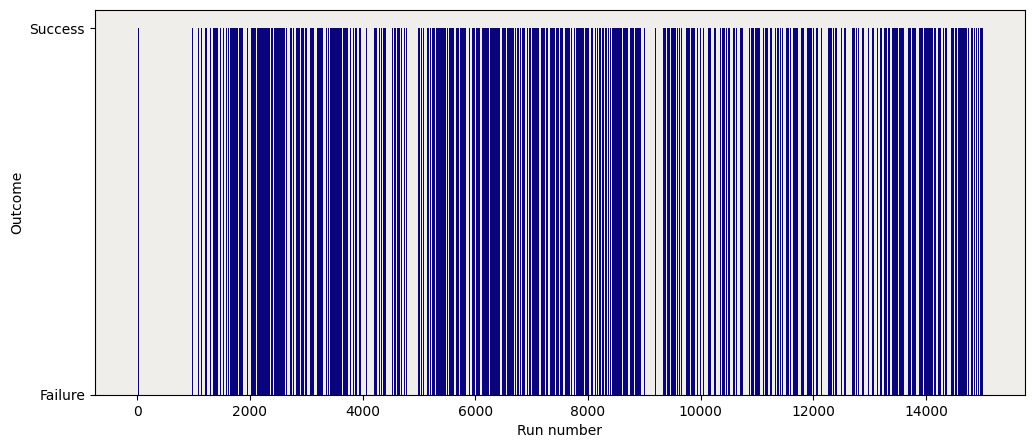

In [8]:
# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

In [9]:
env.reset()

episodes = 100
success_rate = []
steps = []

# Evaluation
for episode in range(episodes):
    state = env.reset()[0]
    step = 0
    terminated = False
    
    # Until the agent gets stuck or reaches the goal, keep training it
    for step in range(max_steps):
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state,:])

        # Implement this action and move the agent in the desired direction
        new_state, reward, terminated, truncated, info = env.step(action)
        
        if terminated:
            success_rate.append(int(reward == 1))
            steps.append(step)
            
            break

        # Update our current state
        state = new_state

env.close()

# Let's check our success rate!
print("Mean Step:", np.mean(steps))
print("Success rate:", np.mean(success_rate)*100, "%")

Mean Step: 35.44086021505376
Success rate: 69.89247311827957 %
